In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [2]:
df = pd.read_csv("allocations.csv", encoding="latin-1")
df["Day"] = df["Day"].map(lambda x: int(x[4:]))
df.head()

Day                    Position               Position Type  Candidate Id   
0    1  Client Services Assistant   Client Services Assistant            130  \
1    1  Client Services Assistant   Client Services Assistant            158   
2    1  Client Services Assistant   Client Services Assistant            209   
3    1  Client Services Assistant   Client Services Assistant            210   
4    1  Client Services Assistant   Client Services Assistant            236   

        Candidate Name  Experience  Language Skills  Presentation Skills  
0  Francisco Fernandes           5                4                    0  
1         Inês Ribeiro           5                1                    5  
2        Madalena Lima           5                4                    5  
3    Madalena Oliveira           5                2                    1  
4       Mariana Santos           5                3                    0

In [3]:
df.describe()

Day  Candidate Id   Experience  Language Skills   
count  1661.000000   1661.000000  1661.000000      1661.000000  \
mean      4.914509    168.593618     4.129440         2.472607   
std       2.420527     96.618043     1.527099         1.477543   
min       1.000000      1.000000     0.000000         0.000000   
25%       3.000000     85.000000     4.000000         1.000000   
50%       5.000000    171.000000     5.000000         2.000000   
75%       7.000000    255.000000     5.000000         4.000000   
max       9.000000    330.000000     5.000000         5.000000   

       Presentation Skills  
count          1661.000000  
mean              2.543046  
std               1.445844  
min               0.000000  
25%               1.000000  
50%               3.000000  
75%               4.000000  
max               5.000000

In [4]:
print("Maximum total working days: ", df.groupby("Candidate Id").count().max()["Day"])

Maximum total working days:  9


In [5]:
days_array = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])
    days_array.append([1 if i in days else 0 for i in range(1, 10)])

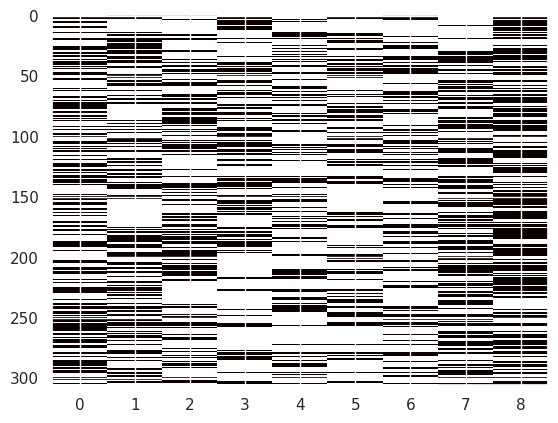

In [6]:
plt.imshow(days_array, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

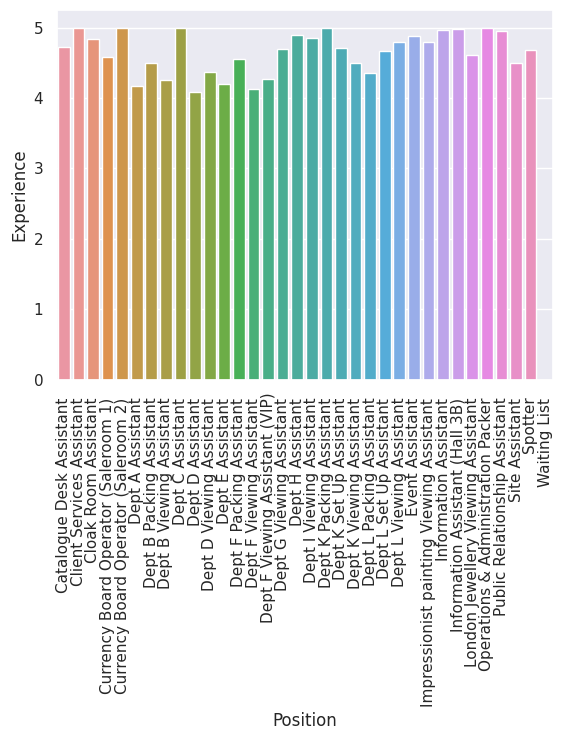

In [7]:
def show_group_by_position():
    df_grouped_by_position = df[["Position", "Experience"]].groupby("Position").mean()
    sns.barplot(data=df_grouped_by_position, x=df_grouped_by_position.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    
show_group_by_position()

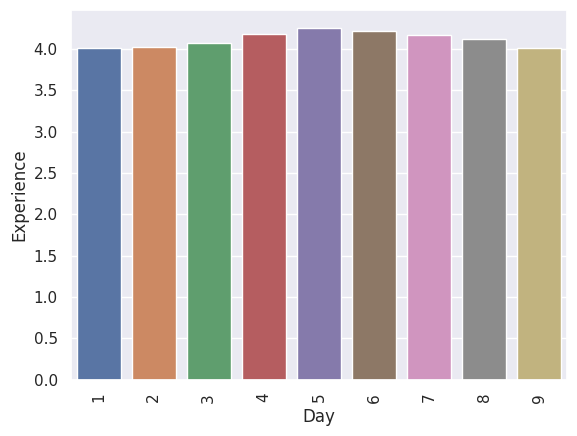

In [8]:
def show_group_by_day():
    df_grouped_by_day = df[["Day", "Experience"]].groupby("Day").mean(numeric_only=True)
    sns.barplot(data=df_grouped_by_day, x=df_grouped_by_day.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
show_group_by_day()

In [10]:
overworked = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])

    consecutive = 0
    for i in range(1, 10):
        if i in days:
            consecutive += 1
            if consecutive >= 7:
                print(candidate, days)
        else:
            consecutive = 0

10 [1, 2, 3, 4, 5, 6, 7]
14 [1, 2, 3, 4, 5, 6, 7, 8]
14 [1, 2, 3, 4, 5, 6, 7, 8]
15 [1, 2, 3, 4, 5, 6, 7, 8, 9]
15 [1, 2, 3, 4, 5, 6, 7, 8, 9]
15 [1, 2, 3, 4, 5, 6, 7, 8, 9]
20 [1, 2, 3, 4, 5, 6, 7, 8]
20 [1, 2, 3, 4, 5, 6, 7, 8]
25 [1, 3, 4, 5, 6, 7, 8, 9]
26 [1, 3, 4, 5, 6, 7, 8, 9]
35 [2, 3, 4, 5, 6, 7, 8]
61 [2, 3, 4, 5, 6, 7, 8, 9]
61 [2, 3, 4, 5, 6, 7, 8, 9]
70 [1, 2, 3, 4, 5, 6, 7, 8, 9]
70 [1, 2, 3, 4, 5, 6, 7, 8, 9]
70 [1, 2, 3, 4, 5, 6, 7, 8, 9]
80 [1, 2, 3, 4, 5, 6, 7, 8]
80 [1, 2, 3, 4, 5, 6, 7, 8]
101 [1, 2, 3, 4, 5, 6, 7, 9]
129 [2, 3, 4, 5, 6, 7, 8]
130 [1, 2, 3, 4, 5, 6, 7, 8]
130 [1, 2, 3, 4, 5, 6, 7, 8]
139 [1, 2, 3, 4, 5, 6, 7, 8]
139 [1, 2, 3, 4, 5, 6, 7, 8]
142 [1, 2, 3, 4, 5, 6, 7, 8]
142 [1, 2, 3, 4, 5, 6, 7, 8]
143 [2, 3, 4, 5, 6, 7, 8]
144 [1, 3, 4, 5, 6, 7, 8, 9]
145 [2, 3, 4, 5, 6, 7, 8, 9]
145 [2, 3, 4, 5, 6, 7, 8, 9]
158 [1, 2, 3, 4, 5, 6, 7, 8]
158 [1, 2, 3, 4, 5, 6, 7, 8]
160 [1, 2, 3, 4, 5, 6, 7]
173 [1, 2, 3, 4, 5, 6, 7]
176 [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
df.head()

Day                    Position               Position Type  Candidate Id   
0    1  Client Services Assistant   Client Services Assistant            130  \
1    1  Client Services Assistant   Client Services Assistant            158   
2    1  Client Services Assistant   Client Services Assistant            162   
3    1  Client Services Assistant   Client Services Assistant            210   
4    1  Client Services Assistant   Client Services Assistant            236   

        Candidate Name  Experience  Language Skills  Presentation Skills  
0  Francisco Fernandes           5                4                    0  
1         Inês Ribeiro           5                1                    5  
2    Isabella Mitchell           4                4                    1  
3    Madalena Oliveira           5                2                    1  
4       Mariana Santos           5                3                    0

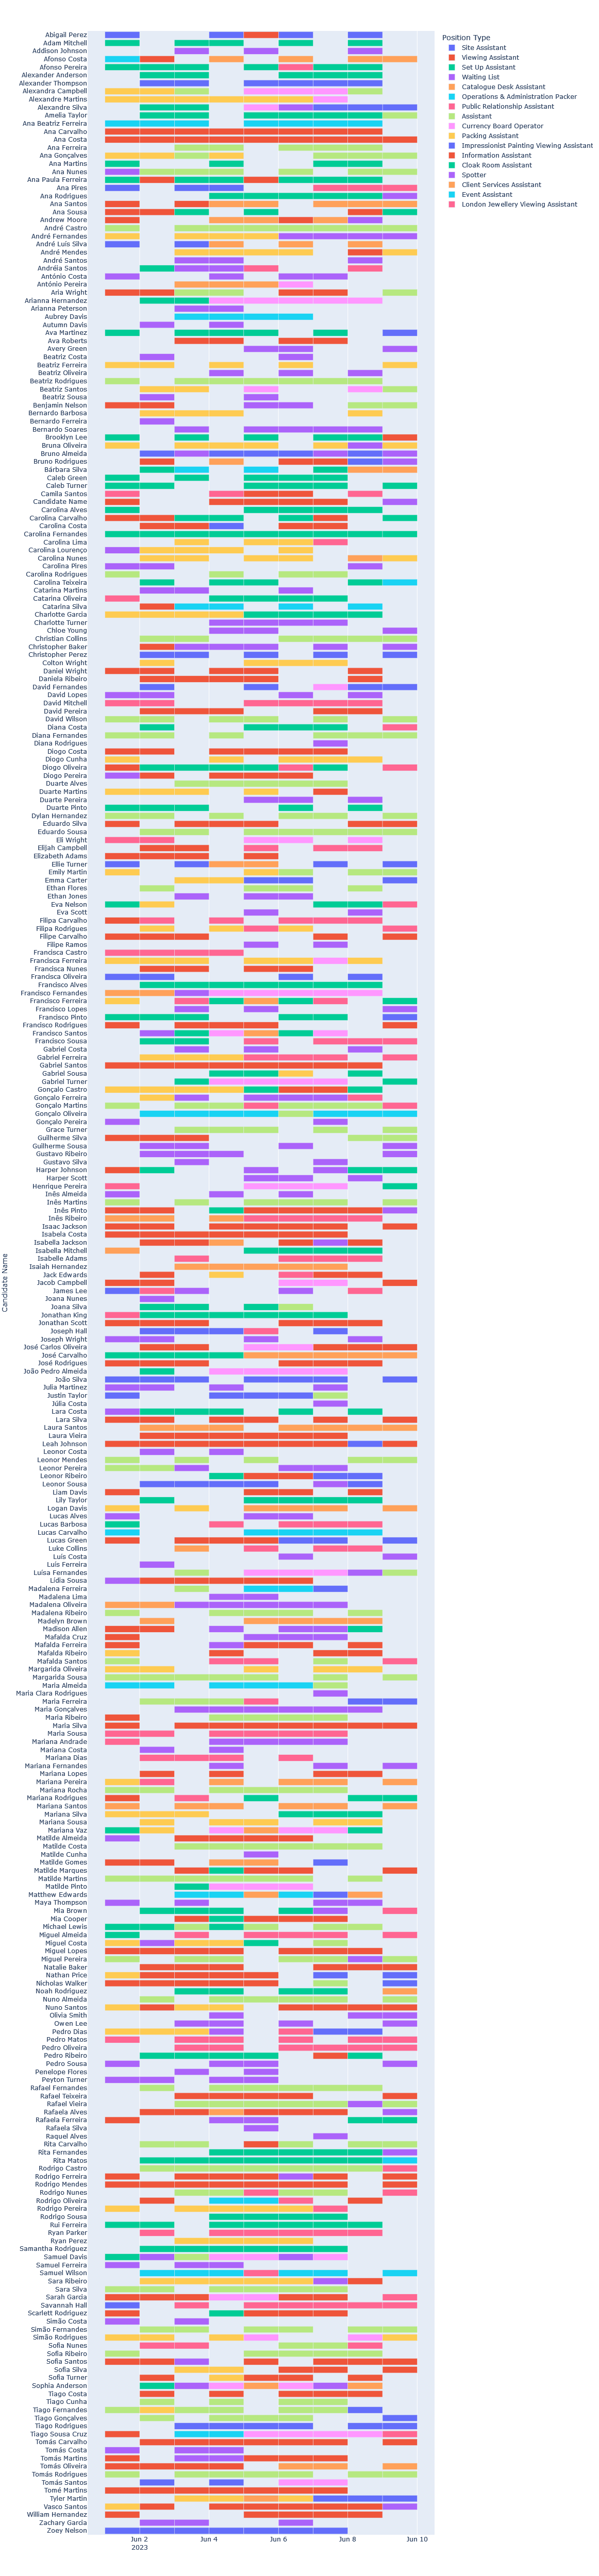

In [11]:
gantt_df = df.copy()
gantt_df["Start"] = gantt_df['Day'].map(lambda x: f"2023-06-{x}")
gantt_df["Finish"] = gantt_df['Day'].map(lambda x: f"2023-06-{x+1}")
gantt_df = gantt_df.sort_values(by=["Candidate Name"])

fig = px.timeline(gantt_df, x_start="Start", x_end="Finish", y="Candidate Name", color="Position Type", height=5000, hover_data=["Position", "Start", "Finish", "Candidate Name", "Experience", "Language Skills", "Presentation Skills"])
fig.update_yaxes(autorange="reversed", categoryorder='array', categoryarray=gantt_df["Candidate Name"])
fig.show()